Omzetten van h5py file naar losse JPGs

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import os
import h5py
import numpy as np
from tensorflow.keras import utils
import matplotlib.image
import matplotlib.pyplot as plt
from random import choice
import sys

sys.path.insert(0, "..")
sys.path

['..',
 'c:\\Users\\hjtfs\\ML_Huub\\HuubS_ML_Opdracht\\template\\notebooks',
 'c:\\Users\\hjtfs\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles',
 'c:\\Users\\hjtfs\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles\\lib\\python',
 'C:\\Users\\hjtfs\\.pyenv\\pyenv-win\\versions\\3.8.1\\python38.zip',
 'C:\\Users\\hjtfs\\.pyenv\\pyenv-win\\versions\\3.8.1\\DLLs',
 'C:\\Users\\hjtfs\\.pyenv\\pyenv-win\\versions\\3.8.1\\lib',
 'C:\\Users\\hjtfs\\.pyenv\\pyenv-win\\versions\\3.8.1',
 'C:\\Users\\hjtfs\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\hu-deeplearning-lSm0EZYV-py3.8',
 '',
 'C:\\Users\\hjtfs\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\hu-deeplearning-lSm0EZYV-py3.8\\lib\\site-packages',
 'C:\\Users\\hjtfs\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\hu-deeplearning-lSm0EZYV-py3.8\\lib\\site-packages\\win32',
 'C:\\Users\\hjtfs\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\hu-deeplearning-lSm0EZYV-py3.8\\lib\\site-packages\\wi

In [2]:
datadir_processed = Path("../data/processed")

In [3]:
def get_size(start_path = datadir_processed):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size/1000000

print(get_size(), 'MB')

50.600152 MB


In [4]:
from src.data import make_dataset

datagen_kwargs = dict(rescale=1./255, validation_split=0.2)
dataflow_kwargs = dict(target_size=(64, 64), batch_size=32,
                    interpolation="bilinear")

train, valid = make_dataset.create_generators(datagen_kwargs, dataflow_kwargs, 
                                              datadir = datadir_processed,
                                              augment=False)


2022-01-29 10:16:09.979 | INFO     | src.data.make_dataset:create_generators:38 - Creating validation set data generator
2022-01-29 10:16:10.148 | INFO     | src.data.make_dataset:create_generators:48 - Creating train set data generator


Found 3542 images belonging to 10 classes.
Found 14194 images belonging to 10 classes.


In [5]:
X, y = next(train)

In [6]:
X.shape, y.shape

((32, 64, 64, 3), (32, 10))

In [7]:
class_names = train.class_indices
print(class_names)


{'Barred Spiral': 0, 'Cigar Shaped Smooth': 1, 'Disturbed': 2, 'Edge-on with Bulge': 3, 'Edge-on without Bulge': 4, 'Merging': 5, 'Round Smooth': 6, 'Smooth, Cigar shaped': 7, 'Unbarred Loose Spiral': 8, 'Unbarred Tight Spiral': 9}


In [8]:
train.num_classes


10

2022-01-29 10:16:11.454 | INFO     | src.visualization.visualize:plot_batch:17 - image shape: (32, 64, 64, 3)
2022-01-29 10:16:11.454 | INFO     | src.visualization.visualize:plot_batch:18 - label shape: (32, 10)


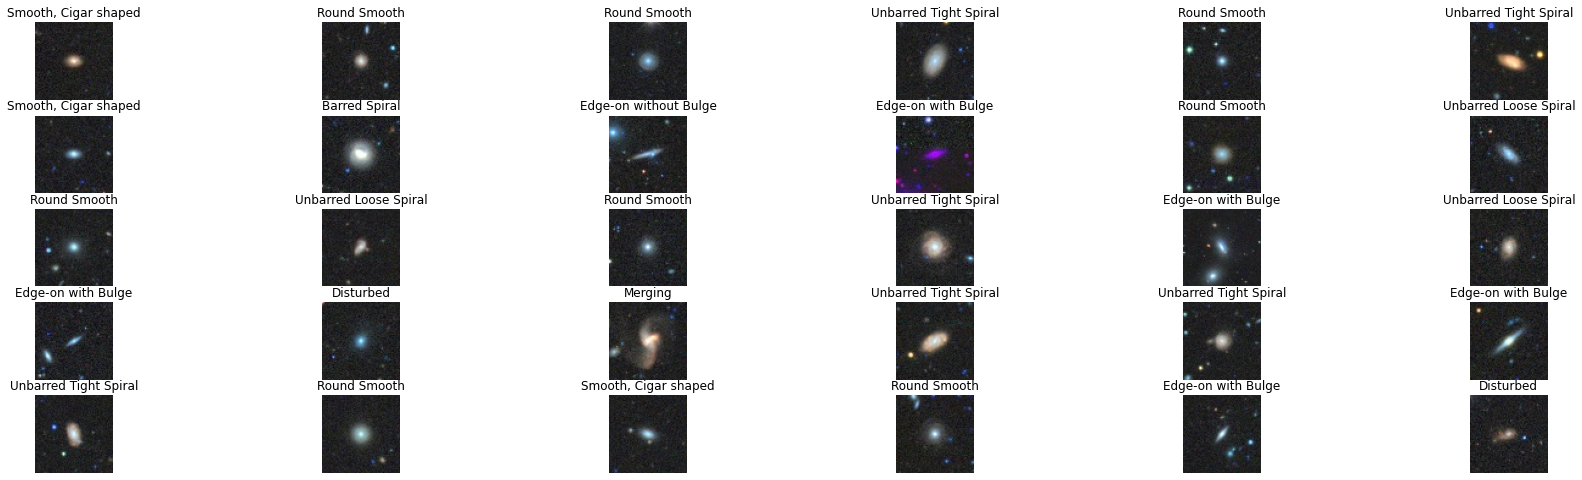

In [9]:
from src.visualization import visualize

visualize.plot_batch(train, grid = 30)


y = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


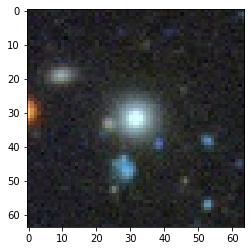

In [13]:
idx =25
digit = X[idx]
plt.imshow(digit)
print(f"y = {y[idx]}")


In [11]:
from typing import Dict, Tuple
from filelock import FileLock
import tensorflow as tf

#def dataset_from_dir(datadir: Path) -> Tuple:
#    lock = str(datadir) + ".lock"
#    with FileLock(lock):
#        whole = tf.keras.utils.image_dataset_from_directory(datadir
#        )
      


#    return whole

In [ ]:
whole = dataset_from_dir(datadir_processed)

visualize.plot_batch(whole, grid = 30)

In [ ]:
#datadir_processed = Path("../data/processed")

whole = tf.keras.utils.image_dataset_from_directory(
    datadir_processed, labels='inferred', label_mode='int')

data_pre.plot_one_of_each(whole)

#class_names = whole.class_names
#print(class_names)

#plt.figure(figsize=(15, 7))
#for images, labels in whole.take(1):
#  for i in range(10):
#    ax = plt.subplot(2, 5, i + 1)
#    #plt.imshow(images[i].numpy().astype("uint8"))
#    plt.imshow(images[i].numpy().astype("uint8"))
#    plt.title(class_names[labels[i]])
#    plt.axis("off")




Found 17736 files belonging to 10 classes.


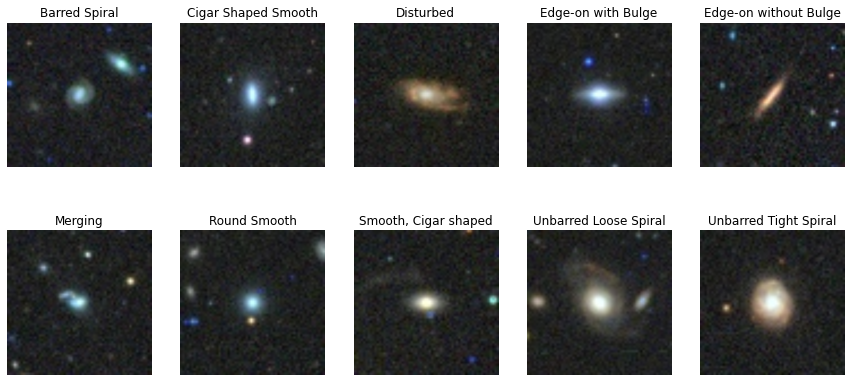

In [15]:
whole = tf.keras.utils.image_dataset_from_directory(
    datadir_processed, labels='inferred', label_mode='int')

class_names = whole.class_names
plt.figure(figsize=(15, 7))
for i in range(len(class_names)):
    filtered_whole = whole.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_whole.take(1):
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

y = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


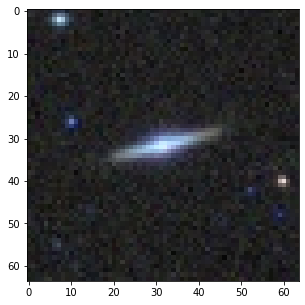

In [22]:
idx =20
digit = X[idx]
plt.figure(figsize=(5, 5))
plt.imshow(digit)
print(f"y = {y[idx]}")